In [1]:
import numpy as np
from prep.ann_approximation import *
from prep.derivatives import Preprocess_derivatives
import matplotlib.pyplot as plt

/home/mike_ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mike_ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mike_ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mike_ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/frame

We upload the solution of ordinary differential equation $u \sin x + u' \cos x = 1$ as f and create x - grid.

In [34]:
temp = np.load('Preprocessing/Fill366/fill366.npy')
f = np.stack([temp, temp], axis = 1)
x = np.linspace(0, 4*np.pi, f.shape[0])

In this step, with the np.stack operation we have added an artificial dimension to the data, to avoid difficulties with ranks of tensorflow tensors, which can occur with the 1D - array (due to differences between tf.Tensor(..., shape=(n, 1), ...), and tf.Tensor(..., shape=(n,), ...)).

In [3]:
print(x.shape, f.shape)

(1000,) (1000, 2)


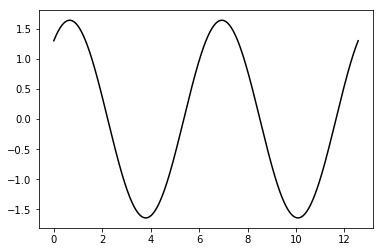

In [4]:
plt.plot(x, f[:, 0], color = 'k')

The entire process of artificial neural network fitting and further derivatives calculation is encapsulated in the *prep.ann_approximation.Preprocess_field* method, which returns the input function approximation and tuple of calculated derivatives. 

In [9]:
approx, derivs_ann = Preprocess_field(f, order=2, steps = (x[1] - x[0], 1))

0  loss on train:  1.6779873 ,  loss on val (after weight adjustment):  17.038525
1  loss on train:  16.071798 ,  loss on val (after weight adjustment):  1.668259
2  loss on train:  1.5999413 ,  loss on val (after weight adjustment):  1.3456227
3  loss on train:  1.3871872 ,  loss on val (after weight adjustment):  1.2604939
4  loss on train:  1.2505124 ,  loss on val (after weight adjustment):  1.0808688
5  loss on train:  1.0729488 ,  loss on val (after weight adjustment):  0.93046033
6  loss on train:  0.9483072 ,  loss on val (after weight adjustment):  1.0641052
7  loss on train:  0.9647519 ,  loss on val (after weight adjustment):  1.0521669
8  loss on train:  1.0254884 ,  loss on val (after weight adjustment):  0.88931775
9  loss on train:  0.96542907 ,  loss on val (after weight adjustment):  0.9450165
10  loss on train:  0.9392205 ,  loss on val (after weight adjustment):  0.936063
11  loss on train:  0.91314584 ,  loss on val (after weight adjustment):  0.9362904
12  loss on 

98  loss on train:  0.31886125 ,  loss on val (after weight adjustment):  0.3446069
99  loss on train:  0.3341985 ,  loss on val (after weight adjustment):  0.24045095
100  loss on train:  0.26840827 ,  loss on val (after weight adjustment):  0.3519945
101  loss on train:  0.30307588 ,  loss on val (after weight adjustment):  0.34532157
102  loss on train:  0.31259924 ,  loss on val (after weight adjustment):  0.27699187
103  loss on train:  0.29774424 ,  loss on val (after weight adjustment):  0.29954356
104  loss on train:  0.29660225 ,  loss on val (after weight adjustment):  0.24609806
105  loss on train:  0.25302032 ,  loss on val (after weight adjustment):  0.23596737
106  loss on train:  0.244343 ,  loss on val (after weight adjustment):  0.22366498
107  loss on train:  0.22906479 ,  loss on val (after weight adjustment):  0.19104432
108  loss on train:  0.21762888 ,  loss on val (after weight adjustment):  0.2230365
109  loss on train:  0.21930097 ,  loss on val (after weight a

193  loss on train:  0.0056212307 ,  loss on val (after weight adjustment):  0.0015521077
194  loss on train:  0.0016624948 ,  loss on val (after weight adjustment):  0.0035128826
195  loss on train:  0.0030654178 ,  loss on val (after weight adjustment):  0.005682279
196  loss on train:  0.0054862415 ,  loss on val (after weight adjustment):  0.009096696
197  loss on train:  0.008292522 ,  loss on val (after weight adjustment):  0.012076619
198  loss on train:  0.011021521 ,  loss on val (after weight adjustment):  0.0123773655
199  loss on train:  0.015007433 ,  loss on val (after weight adjustment):  0.01908829
200  loss on train:  0.01967408 ,  loss on val (after weight adjustment):  0.019341104
201  loss on train:  0.017744115 ,  loss on val (after weight adjustment):  0.011021254
202  loss on train:  0.011466758 ,  loss on val (after weight adjustment):  0.004316798
203  loss on train:  0.0046949005 ,  loss on val (after weight adjustment):  0.001570009
204  loss on train:  0.001

286  loss on train:  0.003562395 ,  loss on val (after weight adjustment):  0.0068594273
287  loss on train:  0.006649187 ,  loss on val (after weight adjustment):  0.007662018
288  loss on train:  0.007514092 ,  loss on val (after weight adjustment):  0.0058855666
289  loss on train:  0.006081906 ,  loss on val (after weight adjustment):  0.003674569
290  loss on train:  0.003985103 ,  loss on val (after weight adjustment):  0.0013683325
291  loss on train:  0.0013205555 ,  loss on val (after weight adjustment):  0.0005614568
292  loss on train:  0.0004978606 ,  loss on val (after weight adjustment):  0.0020838408
293  loss on train:  0.0021243966 ,  loss on val (after weight adjustment):  0.00445382
294  loss on train:  0.006336025 ,  loss on val (after weight adjustment):  0.01093035
295  loss on train:  0.012831956 ,  loss on val (after weight adjustment):  0.019361222
296  loss on train:  0.02056168 ,  loss on val (after weight adjustment):  0.02248653
297  loss on train:  0.02422

379  loss on train:  0.010230329 ,  loss on val (after weight adjustment):  0.0066663516
380  loss on train:  0.007100849 ,  loss on val (after weight adjustment):  0.0039685722
381  loss on train:  0.00401676 ,  loss on val (after weight adjustment):  0.004034048
382  loss on train:  0.0040574195 ,  loss on val (after weight adjustment):  0.0065405834
383  loss on train:  0.0066581597 ,  loss on val (after weight adjustment):  0.008507713
384  loss on train:  0.010721092 ,  loss on val (after weight adjustment):  0.013823723
385  loss on train:  0.014306823 ,  loss on val (after weight adjustment):  0.0122436425
386  loss on train:  0.013281248 ,  loss on val (after weight adjustment):  0.006718446
387  loss on train:  0.0062750895 ,  loss on val (after weight adjustment):  0.0009642534
388  loss on train:  0.0011365463 ,  loss on val (after weight adjustment):  0.0029830912
389  loss on train:  0.00320197 ,  loss on val (after weight adjustment):  0.008481097
390  loss on train:  0.0

471  loss on train:  0.0014836022 ,  loss on val (after weight adjustment):  0.0006772105
472  loss on train:  0.0006501481 ,  loss on val (after weight adjustment):  0.0027548913
473  loss on train:  0.0025014374 ,  loss on val (after weight adjustment):  0.005563098
474  loss on train:  0.0053810524 ,  loss on val (after weight adjustment):  0.007994474
475  loss on train:  0.008056294 ,  loss on val (after weight adjustment):  0.009751176
476  loss on train:  0.009625228 ,  loss on val (after weight adjustment):  0.010537064
477  loss on train:  0.009256923 ,  loss on val (after weight adjustment):  0.0060335267
478  loss on train:  0.0058653797 ,  loss on val (after weight adjustment):  0.0028289848
479  loss on train:  0.0029819128 ,  loss on val (after weight adjustment):  0.0019504926
480  loss on train:  0.0019396815 ,  loss on val (after weight adjustment):  0.0032137886
481  loss on train:  0.003179105 ,  loss on val (after weight adjustment):  0.0047349827
482  loss on train

To evaluate the quality of the derivatives from the automatic differentiation technique, we use previously implemented method *prep.derivatives.Preprocess_derivatives*, which uses analytical differentiation of polynomials, fit over specified window to the data: 

In [35]:
derivs = Preprocess_derivatives(f[:, 0], steps = (x[1] - x[0], 1), smooth=False, mp_poolsize=1, max_order = 2)

Executing on grid with uniform nodes:
1000
Start: 2020-12-17 16:41:09.353749 ; Finish: 2020-12-17 16:41:09.906326
Preprocessing runtime: 0:00:00.552577


First of all, let's compare the quality of approximation of initial function with ANN:

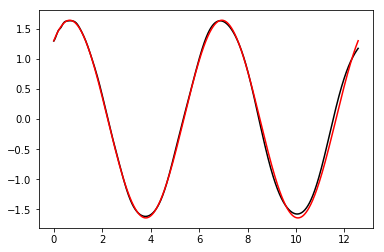

In [7]:
plt.plot(x, approx[:, 0], color = 'k')
plt.plot(x, f[:, 0], color = 'r')

To grasp the better understanding of the Preprocess_field output, let's examine it: we obtain a list, where each element is a list (*derivs*), which represents a derivative order. Next, in a "derivative order" list (here, represented by *derivs[0]*), the first element (*derivs[0][0]*) is the list of values for the derivatives, and the second element is the list of coordinates, by which the corrsponding elements of the first element are differentiated.    

In [8]:
print(derivs[0], '\n')
print(derivs[0][0], '\n')
print(derivs[0][0][0], '\n')

[[[array([0.5127537 , 1.0099328 , 0.62999094, ..., 0.59411407, 0.5496248 ,
       0.5816297 ], dtype=float32)], [array([ 0.35940552, -0.6947883 ,  0.3986012 , ..., -0.984756  ,
        1.1691725 , -0.9641298 ], dtype=float32)]], [['t'], ['x']]] 

[[array([0.5127537 , 1.0099328 , 0.62999094, ..., 0.59411407, 0.5496248 ,
       0.5816297 ], dtype=float32)], [array([ 0.35940552, -0.6947883 ,  0.3986012 , ..., -0.984756  ,
        1.1691725 , -0.9641298 ], dtype=float32)]] 

[array([0.5127537 , 1.0099328 , 0.62999094, ..., 0.59411407, 0.5496248 ,
       0.5816297 ], dtype=float32)] 



Next, we shall plot the function, approximation and derivatives to check the results

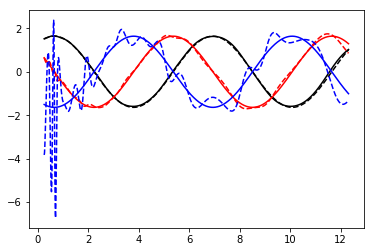

In [19]:
plt.plot(x[20:-20], approx[20:-20, 0], color = 'k', linestyle = '-')
plt.plot(x[20:-20], f[20:-20, 0], color = 'k', linestyle = '--')
plt.plot(x[20:-20], derivs[20:-20, 0], color = 'r', linestyle = '-')
plt.plot(x[20:-20], derivs_ann[0][0][0][0].reshape(f.shape)[20:-20, 0], color = 'r', linestyle = '--')
plt.plot(x[20:-20], derivs[20:-20, 1], color = 'b', linestyle = '-')
plt.plot(x[20:-20], derivs_ann[1][0][0][0].reshape(f.shape)[20:-20, 0], color = 'b', linestyle = '--')

Now, let's create a bit more complex case, where we would try to approximate the solution of wave equation $u_{tt} = c^2  u_{tt}$, with $c = sqrt(0.5)$:

In [36]:
def ic_1(x):
    x_max = 5.
    return np.sin(x/x_max*np.pi)*np.sin((5-x)/x_max*np.pi)

def ic_2(x):
    x_max = 5.; coeff = -1
    return coeff * np.sin(x/x_max*np.pi)*np.sin((5-x)/x_max*np.pi)

x_shape = 301; t_shape = 301
x_max = 5; t_max = 1
x_vals = np.linspace(0, x_max, x_shape)
t_vals = np.linspace(0, t_max, t_shape)
delta_x = x_vals[1] - x_vals[0]; delta_t = t_vals[1] - t_vals[0]
k = 0.5

wave_solution = np.empty((t_shape, x_shape))
wave_solution[:, 0] = wave_solution[:, -1] = 0
wave_solution[0, :] = ic_1(x_vals)
wave_solution[1, :] = wave_solution[0, :] + delta_t * ic_2(x_vals)

for t_idx in np.arange(2, t_shape):
    for x_idx in np.arange(1, x_shape - 1):
        wave_solution[t_idx, x_idx] = k*delta_t**2/delta_x**2 * (wave_solution[t_idx-1, x_idx+1] - 2*wave_solution[t_idx-1, x_idx] + wave_solution[t_idx-1, x_idx-1]) + 2*wave_solution[t_idx-1, x_idx] - wave_solution[t_idx-2, x_idx]

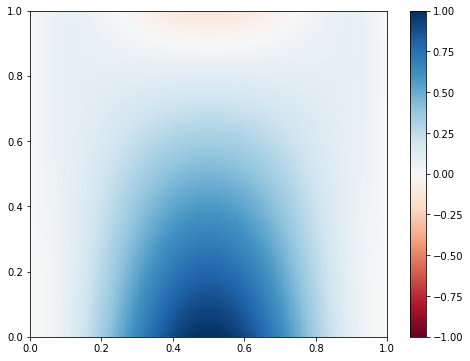

In [37]:
Heatmap(wave_solution)

We'll use previously introduced methods *Preprocess_field* and *Preprocess_derivatives* to get the tensors of derivatives, obtained with automatic differentiation and analytic differentiation correspondingly:

In [61]:
wave_solution_approximation, wave_derivs_ann = Preprocess_field(wave_solution, order=1, steps = (delta_t, delta_x), training_epochs = 300)

0  loss on train:  10.716868 ,  loss on val (after weight adjustment):  1.389636
1  loss on train:  1.405157 ,  loss on val (after weight adjustment):  0.1788848
2  loss on train:  0.18146032 ,  loss on val (after weight adjustment):  0.14375211
3  loss on train:  0.14314124 ,  loss on val (after weight adjustment):  0.05819436
4  loss on train:  0.058029458 ,  loss on val (after weight adjustment):  0.05370212
5  loss on train:  0.05336342 ,  loss on val (after weight adjustment):  0.034124106
6  loss on train:  0.034698714 ,  loss on val (after weight adjustment):  0.033397723
7  loss on train:  0.033406395 ,  loss on val (after weight adjustment):  0.029367177
8  loss on train:  0.029469118 ,  loss on val (after weight adjustment):  0.019763751
9  loss on train:  0.019850591 ,  loss on val (after weight adjustment):  0.016509766
10  loss on train:  0.016605409 ,  loss on val (after weight adjustment):  0.018679686
11  loss on train:  0.01861166 ,  loss on val (after weight adjustmen

93  loss on train:  0.00016180871 ,  loss on val (after weight adjustment):  0.00015851275
94  loss on train:  0.00015712099 ,  loss on val (after weight adjustment):  0.00015096461
95  loss on train:  0.0001520022 ,  loss on val (after weight adjustment):  0.00015168781
96  loss on train:  0.00015425793 ,  loss on val (after weight adjustment):  0.00014503021
97  loss on train:  0.00014508239 ,  loss on val (after weight adjustment):  0.00014425883
98  loss on train:  0.00014342795 ,  loss on val (after weight adjustment):  0.000145189
99  loss on train:  0.00014383417 ,  loss on val (after weight adjustment):  0.00013680269
100  loss on train:  0.00013604466 ,  loss on val (after weight adjustment):  0.00013750637
101  loss on train:  0.0001374115 ,  loss on val (after weight adjustment):  0.00013572582
102  loss on train:  0.00013615123 ,  loss on val (after weight adjustment):  0.00012892763
103  loss on train:  0.00012956477 ,  loss on val (after weight adjustment):  0.00012957379

184  loss on train:  0.00029888103 ,  loss on val (after weight adjustment):  0.00011005199
185  loss on train:  0.00011225965 ,  loss on val (after weight adjustment):  0.00026946812
186  loss on train:  0.00027060686 ,  loss on val (after weight adjustment):  0.00022804394
187  loss on train:  0.00022757401 ,  loss on val (after weight adjustment):  0.0001131399
188  loss on train:  0.00011200344 ,  loss on val (after weight adjustment):  0.00024290633
189  loss on train:  0.00024297203 ,  loss on val (after weight adjustment):  0.00017869279
190  loss on train:  0.00018058601 ,  loss on val (after weight adjustment):  0.00010822234
191  loss on train:  0.000106376465 ,  loss on val (after weight adjustment):  0.00020754886
192  loss on train:  0.00020694888 ,  loss on val (after weight adjustment):  0.00015709002
193  loss on train:  0.00015674607 ,  loss on val (after weight adjustment):  9.793699e-05
194  loss on train:  9.8124445e-05 ,  loss on val (after weight adjustment):  0.0

275  loss on train:  0.0014040342 ,  loss on val (after weight adjustment):  0.0030494144
276  loss on train:  0.003036075 ,  loss on val (after weight adjustment):  0.004827826
277  loss on train:  0.0048856065 ,  loss on val (after weight adjustment):  0.007306591
278  loss on train:  0.007338809 ,  loss on val (after weight adjustment):  0.0035148012
279  loss on train:  0.0034906822 ,  loss on val (after weight adjustment):  0.00045242812
280  loss on train:  0.00045098236 ,  loss on val (after weight adjustment):  0.0017501287
281  loss on train:  0.0017669863 ,  loss on val (after weight adjustment):  0.0026349095
282  loss on train:  0.0026685332 ,  loss on val (after weight adjustment):  0.0009821665
283  loss on train:  0.0009744434 ,  loss on val (after weight adjustment):  0.00049096794
284  loss on train:  0.0004825275 ,  loss on val (after weight adjustment):  0.0018415555
285  loss on train:  0.0018262954 ,  loss on val (after weight adjustment):  0.0011031078
286  loss o

In [51]:
wave_derivs = Preprocess_derivatives(wave_solution, steps = (delta_t, delta_x), smooth=False, mp_poolsize=1, max_order = 1)

Executing on grid with uniform nodes:
90601
Start: 2020-12-17 17:11:53.060769 ; Finish: 2020-12-17 17:13:06.143478
Preprocessing runtime: 0:01:13.082709


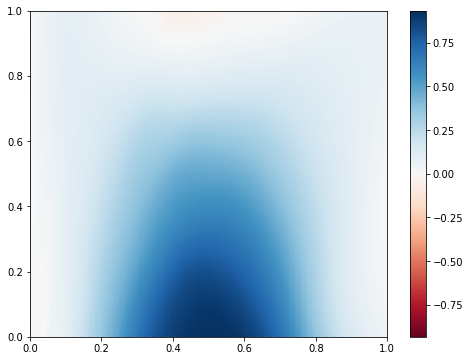

In [62]:
Heatmap(wave_solution_approximation)

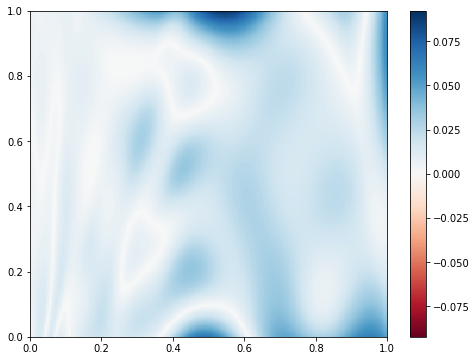

In [63]:
Heatmap(np.abs(wave_solution_approximation - wave_solution))

Here, we can notice, that in the centre of the domain the quality of the solution approximation is decent, while near the boundaries errors tend to be higher. The same pattern extends on the derivatives, but the areas of high errors tend to be larger.

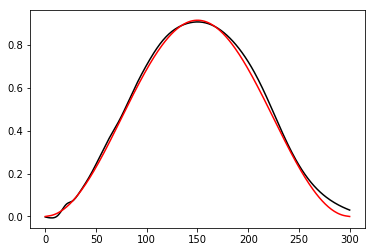

In [64]:
plt.plot(wave_solution_approximation[25, :], color = 'r') # red line for the approximation
plt.plot(wave_solution[25, :], color = 'k') # black line for the initial function

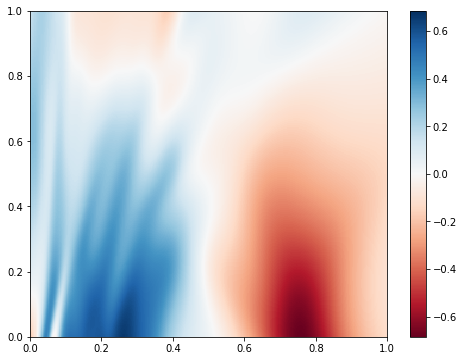

In [65]:
Heatmap(wave_derivs_ann[0][0][1][0].reshape(wave_solution.shape))

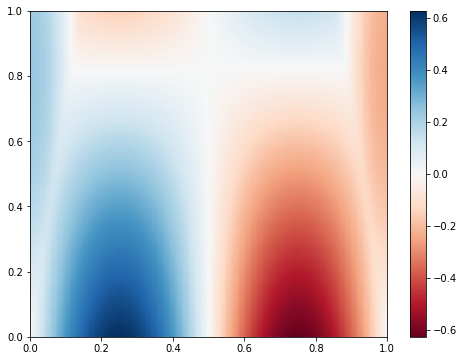

In [60]:
Heatmap(wave_derivs[:, 1].reshape(wave_solution.shape))

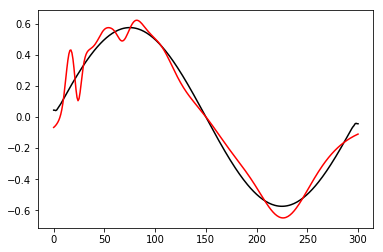

In [67]:
plt.plot(wave_derivs[:, 1].reshape(wave_solution.shape)[25, :], color = 'k') # black line for the derivatives from baseline method
plt.plot(wave_derivs_ann[0][0][1][0].reshape(wave_solution.shape)[25, :], color = 'r') # red line for the derivatives from ann

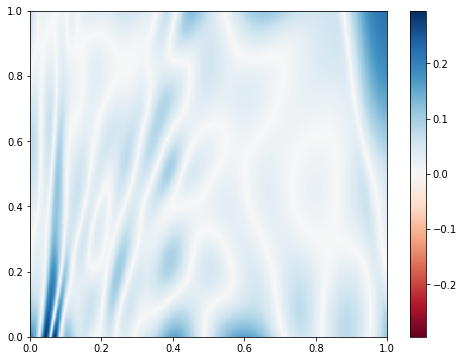

In [69]:
Heatmap(np.abs(wave_derivs_ann[0][0][1][0].reshape(wave_solution.shape) - wave_derivs[:, 1].reshape(wave_solution.shape)))